In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import joblib

In [18]:
df = pd.read_csv('D:\\advertising.csv')
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [3]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [4]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


### Exploratory Data Analysis

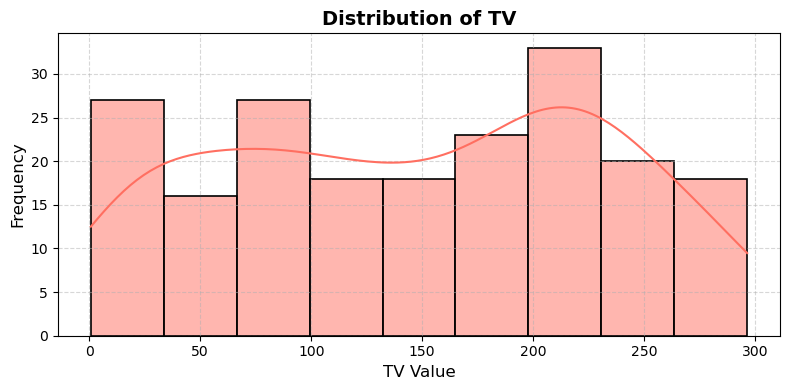

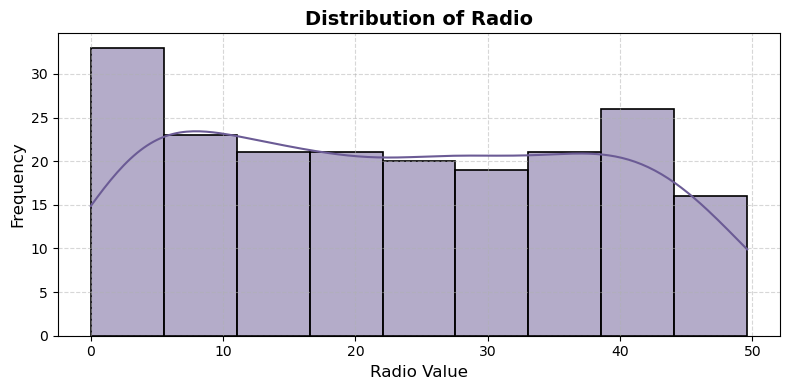

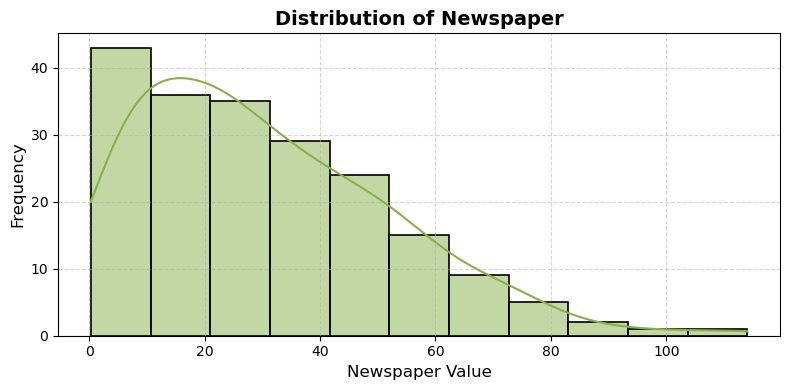

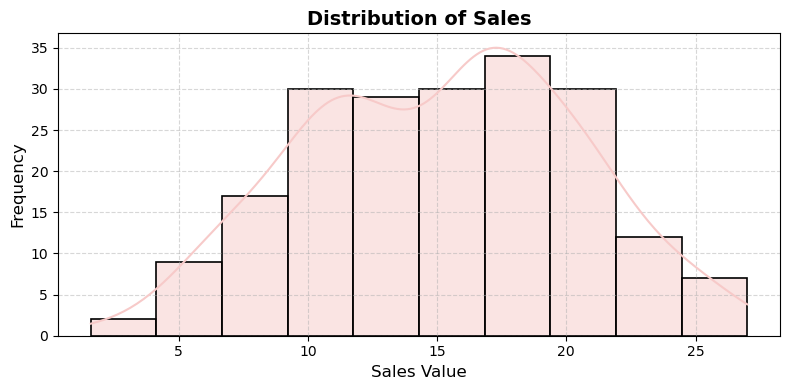

In [7]:
ad_features = ['TV', 'Radio', 'Newspaper', 'Sales']
colors = ['#FF6F61', '#6B5B95', '#88B04B', '#F7CAC9']  

for i, feature in enumerate(ad_features):
    plt.figure(figsize=(8, 4))
    sns.histplot(df[feature], kde=True, color=colors[i], edgecolor='black', linewidth=1.2)
    plt.title(f'Distribution of {feature}', fontsize=14, fontweight='bold')
    plt.xlabel(f'{feature} Value', fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()

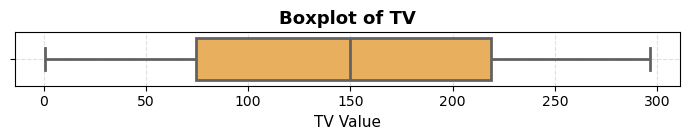

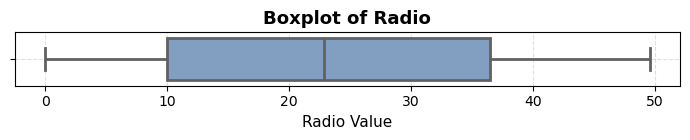

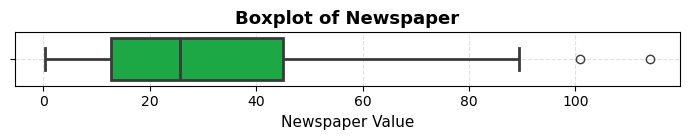

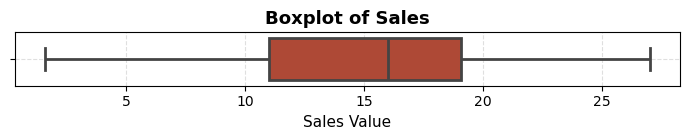

In [8]:
ad_columns = ['TV', 'Radio', 'Newspaper', 'Sales']
box_colors = ['#FFB347', '#779ECB', '#03C03C', '#C23B22']  

for i, column in enumerate(ad_columns):
    plt.figure(figsize=(7, 1.5))
    sns.boxplot(x=df[column], color=box_colors[i], linewidth=2)
    plt.title(f'Boxplot of {column}', fontsize=13, fontweight='bold')
    plt.xlabel(f'{column} Value', fontsize=11)
    plt.grid(True, linestyle='--', alpha=0.4)
    plt.tight_layout()
    plt.show()

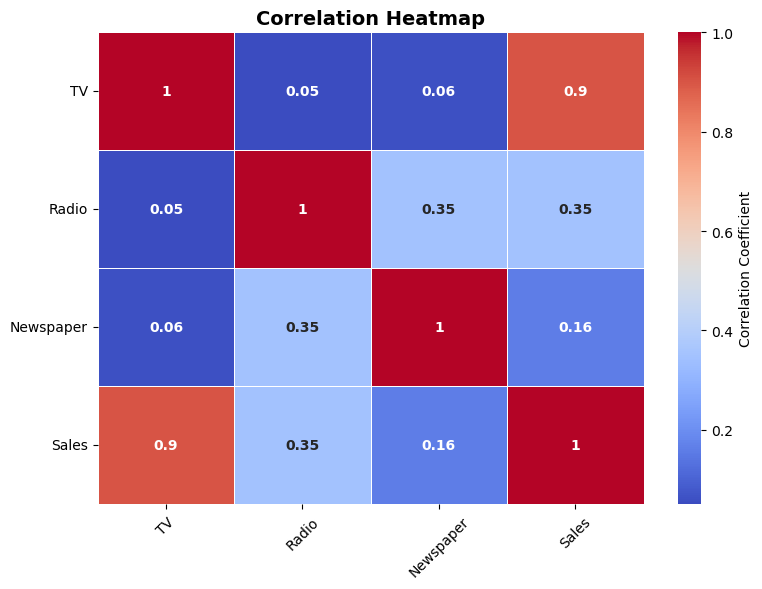

In [9]:
plt.figure(figsize=(8, 6))  
sns.heatmap(df.corr().round(2), 
            annot=True, 
            cmap='coolwarm', 
            linewidths=0.5, 
            linecolor='white', 
            annot_kws={"size": 10, "weight": "bold"},
            cbar_kws={'label': 'Correlation Coefficient'})

plt.title("Correlation Heatmap", fontsize=14, fontweight='bold')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [10]:
df.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


###  Feature Engineering

In [11]:
df['Interaction_TV_Radio'] = df['TV'] * df['Radio']
df['Interaction_TV_Newspaper'] = df['TV'] * df['Newspaper']
df['Interaction_Radio_Newspaper'] = df['Radio'] * df['Newspaper']

In [12]:
for col in ['TV', 'Radio', 'Newspaper']:
    df[f'Log_{col}'] = np.log1p(df[col])

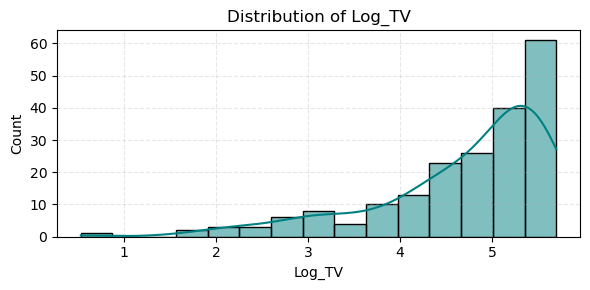

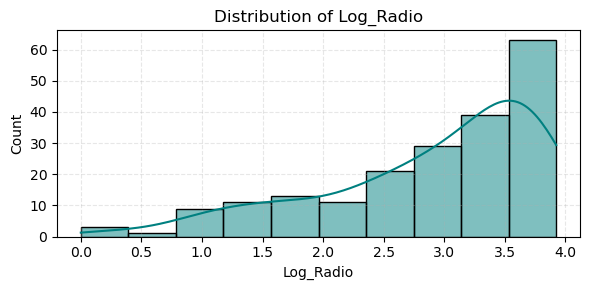

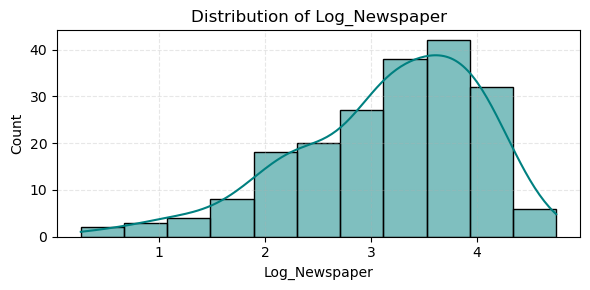

In [14]:
log_features = ['Log_TV', 'Log_Radio', 'Log_Newspaper']
for feature in log_features:
    plt.figure(figsize=(6, 3))
    sns.histplot(df[feature], kde=True, color='teal')
    plt.title(f'Distribution of {feature}')
    plt.grid(True, linestyle='--', alpha=0.3)
    plt.tight_layout()
    plt.show()

In [13]:
target_column = 'Sales'
X = df.drop(columns=[target_column])
y = df[target_column]

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),       
    "Lasso Regression": Lasso(alpha=0.1),       
    "Random Forest": RandomForestRegressor(n_estimators=150, random_state=42)
}
print("Models defined:")
for name in models:
    print(f"- {name}")

Models defined:
- Linear Regression
- Ridge Regression
- Lasso Regression
- Random Forest


In [20]:
def evaluate_model(name, model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"{name} Performance:")
    print("  R2 Score :", round(r2_score(y_test, y_pred), 4))
    print("  MAE      :", round(mean_absolute_error(y_test, y_pred), 4))
    print("  RMSE     :", round(np.sqrt(mean_squared_error(y_test, y_pred)), 4))
    print("-"*40)
    return model

trained_models = {}
for name, model in models.items():
    trained_models[name] = evaluate_model(name, model, X_train, X_test, y_train, y_test)

Linear Regression Performance:
  R2 Score : 0.9469
  MAE      : 0.9311
  RMSE     : 1.2807
----------------------------------------
Ridge Regression Performance:
  R2 Score : 0.9467
  MAE      : 0.9252
  RMSE     : 1.2836
----------------------------------------
Lasso Regression Performance:
  R2 Score : 0.9443
  MAE      : 0.9855
  RMSE     : 1.3119
----------------------------------------
Random Forest Performance:
  R2 Score : 0.9603
  MAE      : 0.7867
  RMSE     : 1.1071
----------------------------------------


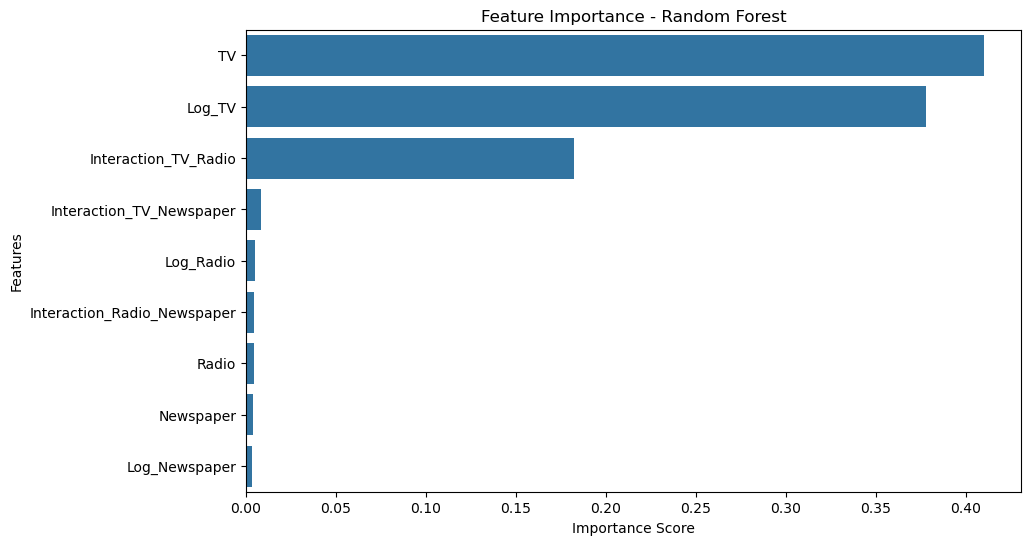

In [21]:
rf = trained_models['Random Forest']
importances = rf.feature_importances_
feat_names = X.columns
sorted_indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10,6))
sns.barplot(x=importances[sorted_indices], y=feat_names[sorted_indices])
plt.title("Feature Importance - Random Forest")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()

In [22]:
ridge = Ridge()
params = {'alpha': [0.01, 0.1, 1.0, 10.0, 50.0]}
grid = GridSearchCV(ridge, param_grid=params, cv=5, scoring='r2')
grid.fit(X_train, y_train)
print("Best Ridge Parameters:", grid.best_params_)
print("Best CV Score:", round(grid.best_score_, 4))

Best Ridge Parameters: {'alpha': 0.1}
Best CV Score: 0.9192


Correlation Table:
                  TV     Radio  Newspaper     Sales
TV         1.000000  0.054809   0.056648  0.901208
Radio      0.054809  1.000000   0.354104  0.349631
Newspaper  0.056648  0.354104   1.000000  0.157960
Sales      0.901208  0.349631   0.157960  1.000000


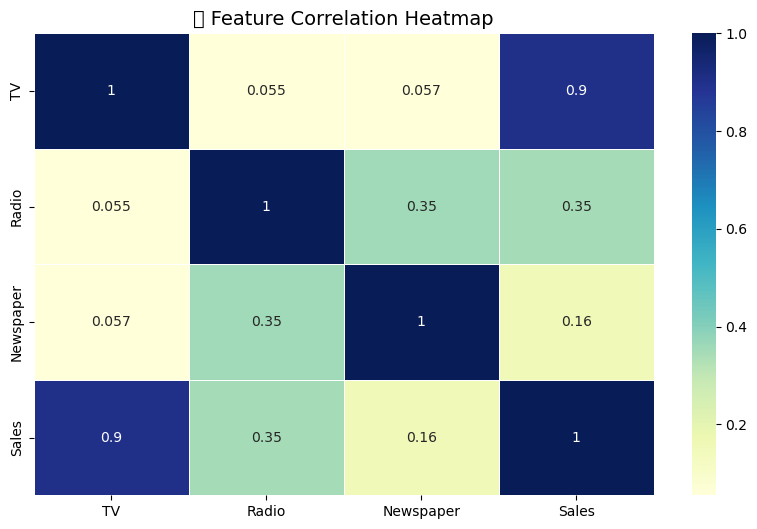

In [24]:
corr_matrix = df.corr()
print("Correlation Table:\n", corr_matrix)

plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='YlGnBu', linewidths=0.5)
plt.title("🔍 Feature Correlation Heatmap", fontsize=14)
plt.show()